# Empalme con la clase anterior.


# Fenómeno de dispersion  numerica.
Recuerde el ejemplo del peloton de ciclistas. Cuando van en plan van todos juntos, cuando  comienza la loma se **dispersan**. Los mas livianos suben mas rapido, los mas pesados mas lento.

**Dispersion**: Diferentes numeros de onda $k$ viajan a distanta velocidad.

* **Fisica**: Es el fen'omeno puramente fisico. Lo que se vera en un pantano.

* **Numerica**: Es debida a la forma como se discretiza la ecuacion de onda.

**Definiciones**:
* Velocidad de fase
$$v_f = \frac{\omega}{k}  $$
* Velocidad de grupo
$$v_f = \frac{\partial \omega}{\partial k}  $$

Si no hay dispersion $v_f=v_g=\omega/k$. Pero en general la dispersion existe.

Expliquemos mejor.
Recuerde la ecuacion de onda

Ignoramos la fuente.
$$\frac{\partial^2 u}{\partial x^2} - \frac{1}{c^2} \frac{\partial^2 u}{\partial  t^2} = 0  $$

Podemos sacar la tranformada doble de Fourier de $x \to k$ y $t \to \omega$. Si por alguna razon no recuerda simplemente ausma que la solucion es de la forma  

$$u(x,t,k, \omega) = A \mathrm{e}^{\mathrm{i}(kx - \omega t) } $$
si hace esto, poner esta soucion en la ecuacion de onda obtiene

$$A \left ( -k^2 + \frac{1}{c^2} \omega^2 \right ) = 0  $$
Si $A \ne 0$
Tenemos

$$k^2 = \frac{1}{c^2} \omega^2 $$
A esto se le llama la **relacion de dispersion** de la onda acustica.

Soluciones

$$\omega = \pm c k $$
La relacion de dispersion muestra la dependencia entre $\omega$ y $k$

**Problema**: Halle la velocidad de fase y de grupo de esta ecuacion de onda.

* **fase**:
$$v_f = \frac{\omega}{k} = \pm c $$

* **grupo**:
$$v_g = \frac{\partial \omega}{\partial k} = \pm c $$

O sea que esta ecuacion no es **fisicamente** dispersiva. La velocidad de fase= velocidad de grupo = $c$.

Vamos a ver como la dispersion si existe (numerica).

Tomemos el siguiente esquema de la ecuacion de onda

$$w_{i j+1} = \gamma^2 w_{i-1 j} + 2(1  - \gamma^2) w_{ij} +\gamma^2 w_{i+1 j} - w_{i j-1} \tag{9}$$
donde $\gamma = c \Delta t/\Delta x$.

Recuerde que si no queremos tomar transformadas de Fourier, simplemente reemplazmos por la Ecuacion de igual forma que hicimos el analisis de estabilidad de von Neumann o usamos estas reglas.

$$u(x, t + \Delta t) \to \mathrm{e}^{-\mathrm{i} \omega \Delta t} U(k, \omega) $$
$$u(x + \Delta x,   t ) \to \mathrm{e}^{\mathrm{i} k  \Delta x} U(k, \omega) $$
Se puden combinar los dos.
La Ecuacion (9) queda

$$W_{ij} (
    \mathrm{e}^{\mathrm{i} \omega \Delta t}
    + \mathrm{e}^{-\mathrm{i} \omega \Delta t}  )
    = \left (  
        \gamma^2  \mathrm{e}^{-\mathrm{i} k \Delta x}
        -2 (1 - \gamma^2) + \gamma^2 \mathrm{e}^{\mathrm{i} k \Delta x}
        \right )  W_{ij}
    $$

Asumimos que $W_{ij} \ne 0 $, cancelamos. Usamos las identidades de Euler

$$
[ 2 \cos \omega \Delta t - 2 \gamma^2 \cos k
\Delta x -2(1 - \gamma^2) =0
$$
Como buscamos una relacion de disperión $\omega=\omega(k)$ despejamos $\omega$


$$
 \cos \omega \Delta t =  \gamma^2 \cos k
\Delta x + (1 - \gamma^2)
$$

$$\omega \Delta t = \cos^{-1} \left ( \gamma² \cos k \Delta x + (1 - \gamma²)  \right )  \tag{1}$$

Calculamos de acá la velocidad de fase y a velocidad de grupo.

$$v_f = \frac{\omega}{k} = \frac{1}{k \Delta t}
\cos^{-1}[  \gamma² \cos k \Delta x + (1 - \gamma²)]  $$

Recuerde que
$$\frac{d \cos^{-1}(x)}{\partial x} = \frac{1}{\sqrt{1 - x^2}}$$

De forma la velocidad de grupo es

$$v_g = \frac{\partial w}{\partial k} = \frac{\Delta x}{\Delta t} \frac{-\gamma² \sin k \Delta x}{\sqrt{1 - \left [ \gamma² \cos k \Delta x + (1 - \gamma²) \right ]^2}} $$

Es el sistema dispersivo? En general si, $v_f \ne v_g$ y dependen de $k$.  Es dispersivo excepto para $\gamma=1$
$\gamma=1$, $c \Delta t/\Delta x= 1$

$$c = \frac{\Delta x}{\Delta t} $$
para no ser dispersivo. Por que?


$$\omega \Delta t = \cos^{-1} \left ( \cos k \Delta x  \right ) =  k \Delta x $$

De acá que

$$v_f = \frac{\omega}{k} = \frac{\Delta x}{\Delta t}. $$
$$v_g = \frac{\partial \omega}{\partial k} = \frac{\Delta x}{\Delta t}. $$

O sea que $v_f=v_g=\Delta x/\Delta t$, constante

Verificamos esto por medio de código.

In [ ]:
# solucion numerica de la ecuacion de onda de la clase 10



In [5]:
# implementacion numerica
def solve_waveeq(c, a, b, t0, nt, nx, dt, e, f , p, q , g):

    # calculamos la velocidad maxima
    X = np.linspace(a, b, nx)
    cmax = max(c(xx) for xx in X)

    print("maxima velocidad", cmax)

    # compute L, dx, gamma, stab_cond
    L=b-a
    dx = L/(nx-1)
    gamma=cmax*dt/dx

    print("gamma", gamma)

    # verificamos condicion de estabilidad
    stab_cond=dx/cmax
    if (dt >= stab_cond):
        print("La condicion de estabilidad no se cumple")
        print(f" dt={dt} debe ser menor que dx/c={dx/cmax} ")
        # return

    tmax = t0 + nt*dt
    t=np.arange(t0, tmax, dt)

    # inicializar w
    w = np.zeros((nx,nt), dtype=float)

    print("dimensiones de w ", w.shape)

    # condiciones iniciales
    for i in range(1, nx):
        w[i,0] = p(X[i])

    # falta la condicion en la derivada. Arreglar
    # condiciones de frontera
    for j in range(nt):
        w[0,j] = e(t[j])
        w[nx-1,j] = f(t[j])

    # solucion numerica
    # llenar la primera capa
    for i in range(1, nx-1):
        gamma = c(X[i])*dt/dx
        w[i,1]= (0.5*gamma**2*p(X[i-1]) + (1.0 - gamma**2)*p(X[i]) +
            0.5*gamma**2*p(X[i+1]) + q(X[i])*dt
            + 0.5*c(X[i])**2*dt**2*g(X[i],  t0))

    # como ya tenemos dos capas comenzamos las iteraciones en tiempo
    for j in range(1, nt-1):
        for i in range(1, nx-1):
            gamma = c(X[i])*dt/dx
            w[i,  j+1] = (gamma**2 * w[i-1, j] + 2.*(1 - gamma**2)*w[i,j]
            + gamma**2*w[i+1,j] - w[i,j-1]
            + g(X[i], t[j])*c(X[i])**2*dt**2)

    return w

Vamos a  usar como $p(x)$ (condicion inicial)

$$f(x) =
\begin{cases}
1 &  x = 1/2 \\
0 &  x = 0 \\
\end{cases}
 $$

In [6]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt


# velocidad
def v(x):
    return 1

# condiciones de borde iniciales 0
def e(t):
    return 0

def f(t):
    return 0

# condicion inicial
def p(x):
    # impulso
    if x == 0.5: return 1
    else : return 0

def q(x):
    return 0

def g(x,t):
    return 0.0

# parametros
dt = 0.001
nt=1001
nx=501
a = 0
b= 1
t0=0

w = solve_waveeq(v, a, b, t0, nt, nx, dt, e, f , p, q , g)





maxima velocidad 1
gamma 0.5
dimensiones de w  (501, 1001)


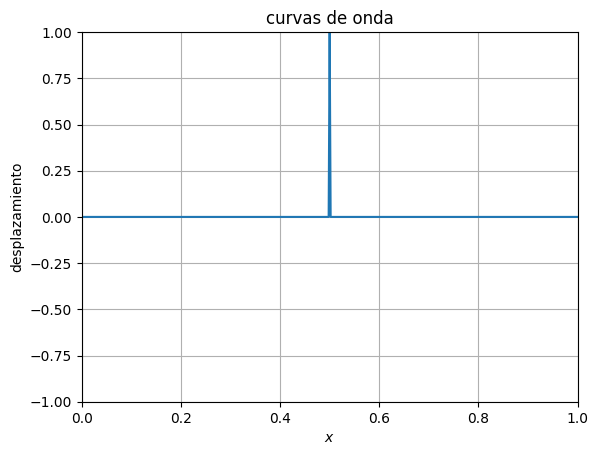

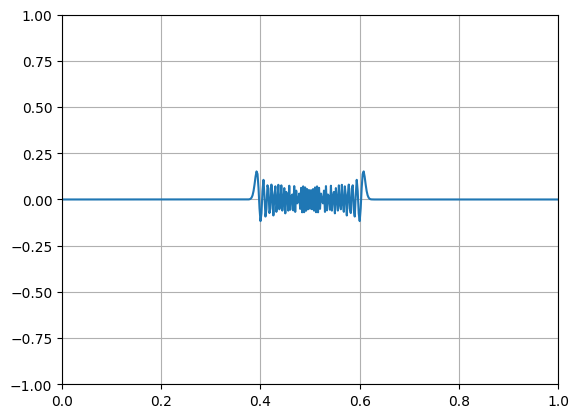

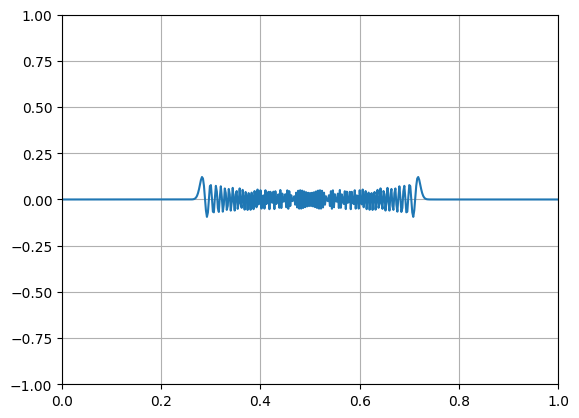

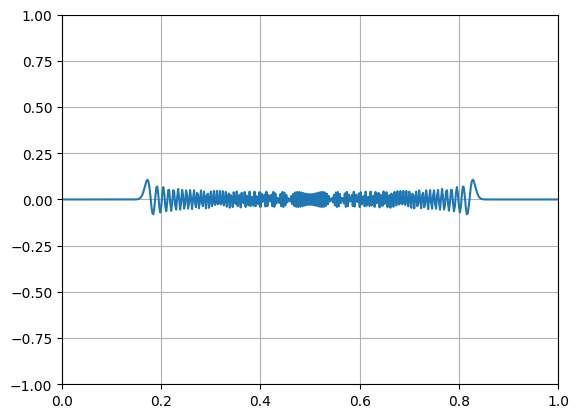

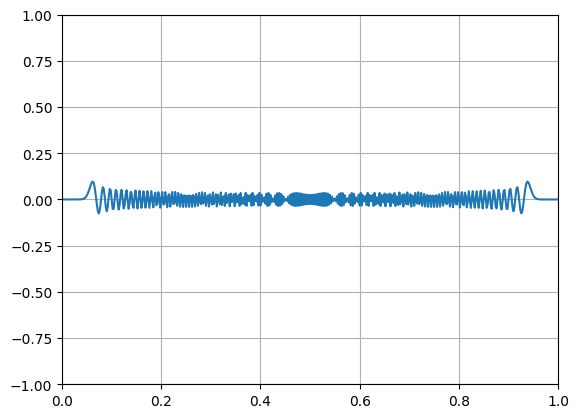

In [10]:
# graficamos el resultado
Ndt = 111

# labels
plt.xlabel(r"$x$")
plt.ylabel(r'desplazamiento')
# title
plt.title("curvas de onda")

Nt = int(nt/2)

# domain
X = np.linspace(a, b, w.shape[0])

# curvas de desplazamiento
for j in range(0, Nt, Ndt):
    t = j*dt + t0

    # plot it
    plt.plot(X, w[:,j], label=str(round(t,1)) +  ' seg')
    plt.axis([0,1, -1, 1])

    plt.grid()
    plt.show()

In [11]:
# que pasa si gamma=1, Delta x = Delta t, nx=1001
nx=1001

w = solve_waveeq(v, a, b, t0, nt, nx, dt, e, f , p, q , g)


maxima velocidad 1
gamma 1.0
La condicion de estabilidad no se cumple
 dt=0.001 debe ser menor que dx/c=0.001 
dimensiones de w  (1001, 1001)


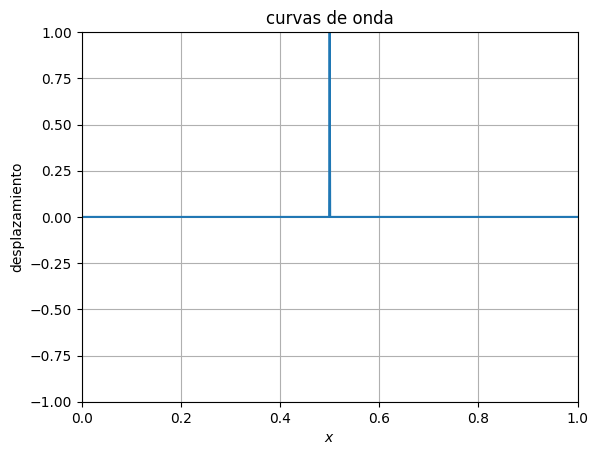

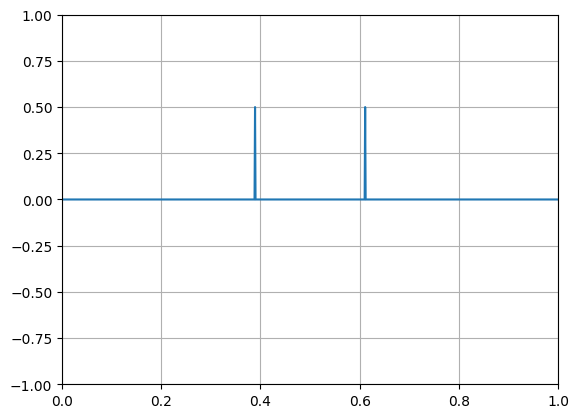

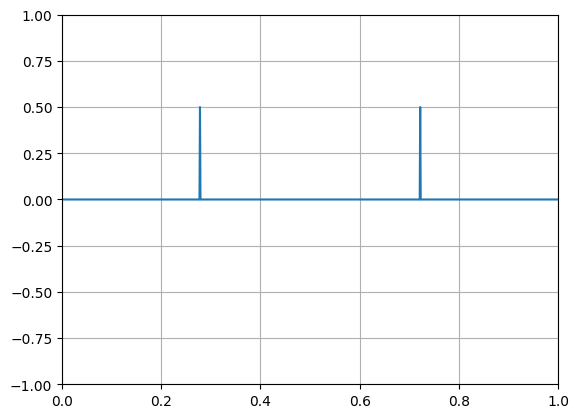

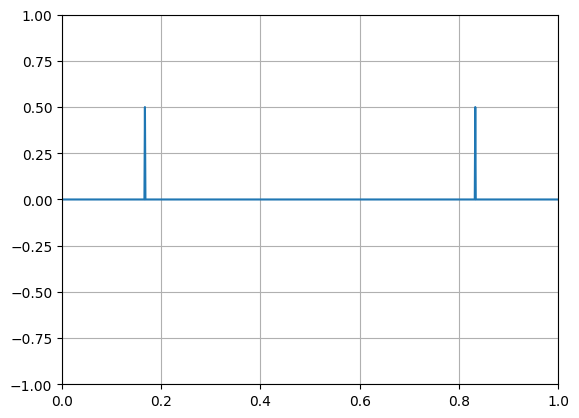

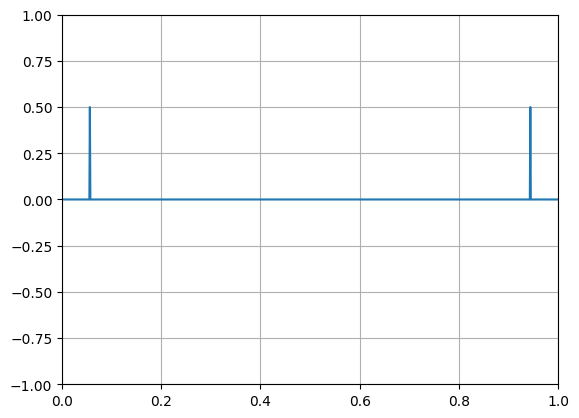

In [12]:
# graficamos el resultado
Ndt = 111

# labels
plt.xlabel(r"$x$")
plt.ylabel(r'desplazamiento')
# title
plt.title("curvas de onda")

Nt = int(nt/2)

# domain
X = np.linspace(a, b, w.shape[0])

# curvas de desplazamiento
for j in range(0, Nt, Ndt):
    t = j*dt + t0

    # plot it
    plt.plot(X, w[:,j], label=str(round(t,1)) +  ' seg')
    plt.axis([0,1, -1, 1])

    plt.grid()
    plt.show()

# Análisis de dispersión en la Ecuacion de Advección
Tomamos

$$u_x + \frac1c u_t = 0 $$

Si tomamos la transformada de Fourier de esta equation

$$\left (  \mathrm{i} k - \frac{\mathrm{i} \omega}{c} \right ) U(k, \omega)  = 0 $$

Claramente se ve que

$$\omega = kc $$
y
$$v_f = \frac{\omega}{k} = v_g = \frac{\partial \omega}{\partial k} = c $$

La ecuacion de advección no es dispersiva (físicamente).

Numéricamente. Recuerde, de la clase 11

$$w_{i j+1} = -\frac{\gamma}{4} (w_{i+1 j+1} - w_{i-1 j+1}) - \frac{\gamma}{4} (w_{i+1 j} - w_{i-1 j})  + w_{ij} \tag{7}$$

Este es el método de propgación numérica de una ecuación de advección.

Si sacamos la transformada de Forier de esta ecuacion

$$W_{ij} \mathrm{e}^{-\mathrm{i} \omega \Delta t} = -\frac{\gamma}{4} \left (  \mathrm{e}^{\mathrm{i} k \Delta x} \mathrm{e}^{-\mathrm{i} \omega \Delta t} -  \mathrm{e}^{-\mathrm{i} k \Delta x} \mathrm{e}^{-\mathrm{i} \omega \Delta t}\right ) W_{ij}
- \frac{\gamma}{4} \left (  \mathrm{e}^{\mathrm{i} k \Delta x} - \mathrm{e}^{-\mathrm{i}k \Delta x}  \right ) W_{ij} + W_{ij}$$

Podermos asumir que $W \ne 0$ y cancelarlo.



$$\mathrm{e}^{-\mathrm{i} \omega \Delta t} = -\frac{\gamma}{4} \left (  \mathrm{e}^{\mathrm{i} k \Delta x} \mathrm{e}^{-\mathrm{i} \omega \Delta t} -  \mathrm{e}^{-\mathrm{i} k \Delta x} \mathrm{e}^{-\mathrm{i} \omega \Delta t}\right )  
- \frac{\gamma}{4} \left (  \mathrm{e}^{\mathrm{i} k \Delta x} - \mathrm{e}^{-\mathrm{i}k \Delta x}  \right )  + 1
$$

Tarea: Encontrar la velocidad de fase, velocidad de grupo y determinar si la formulación numérica de la ecuación de advección es dispersiva o no, y en que casos, o siempre?
Verificar numéricamente sus resultados.

# Ecuaciones Elípticas.

Se usan para, entre otros
* Encontrar la forma de una membrana
* Encontrar la temperatura estacionaria (que no depende del tiempo) en una superficie
* Encontrar el potencial eléctrico de un campo.
* El Laplaciano es un filtro suavizador.

La Ecuación es

$$\nabla² u(x,y) = \frac{\partial² u(x,y)}{\partial x² } + \frac{\partial² u(x,y) }{\partial y²} = \rho(x,y) $$

Si $\rho(x,y)=0$ se llama la Ecuacion de Laplace.
Si $\rho(x,y)\ne 0$ se llama la Ecuacion de Poisson.

Asumamos un dominio rectangular $(x,y) \in (a,b) \times (c,d)$.
Las condiciones de Direchlet (frontera) están en la frontera

$$[a, y] \cup [b, y] \cup [x, c ] \cup [x, d] $$
donde $e(y) = u(a,y)$, $f(y)=u(b,y)$, $g(x)=u(x,c)$, $h(x)=u(x,d)$.

## Formulación en diferencias finitas.
Tenemos, la malla
Se define $\Delta x$, $\Delta y$, $x_0=a$, $y_0=c$
* $x_i = x_0 + i \Delta x \quad , \quad i=0, \cdots, nx$
* $y_j = y_0 + j \Delta y \quad , \quad  j=0, \cdots, ny$
* $\Delta x = \frac{b-a}{nx}$
* $\Delta y = \frac{d-c}{ny}$





Discretizando en diferencias finitas centradas.

$$\frac{w_{i+1 j} -2 w_{ij} + w_{i-1 j}}{\Delta x²} + \frac{w_{i j+1} -2 w_{ij} + w_{i j-1}}{\Delta y²} = \rho_{ij} $$

Con condiciones de frontera
$$w_{0j} = e_j \quad ,\quad j = 0, 1, \cdots, ny $$
$$w_{nx \; j} = f_j \quad ,\quad j = 0, 1, \cdots, ny $$
$$w_{i0} = g_i \quad ,\quad i = 0, 1, \cdots, nx $$
$$w_{i \; ny} = h_i \quad ,\quad i = 0, 1, \cdots, nx $$

Vamos a crear un sistema matricial. Para esto recuerde el orden
$i+1, i, i-1, j, j+1, j-1$

Despejemos de aca $w_{i+1 j}$, multiplicamos a ambos lados por $\Delta x$

$$w_{i+1 j} - 2 w_{ij} \left ( 1 + \frac{\Delta x²}{\Delta y²} \right ) + w_{i-1 j} + \frac{\Delta x² }{\Delta y² } (w_{i j+1} + w_{i j-1}) = \Delta x² \rho_{ij} $$

Simplificasmos mediante el uso de $\beta=\Delta x/\Delta y$
$$w_{i+1 j} - 2 w_{ij} (1 + \beta²) + w_{i-1 j} + \beta² ( w_{i j+1} + w_{i j-1} = \Delta² x \rho_{ij} \tag{2} $$

Si $\Delta x = \Delta y$, $\beta=1$

$$w_{i+1 j} - 4 w_{ij}  + w_{i-1 j} + ( w_{i j+1} + w_{i j-1}) = \Delta x² \rho_{ij} $$

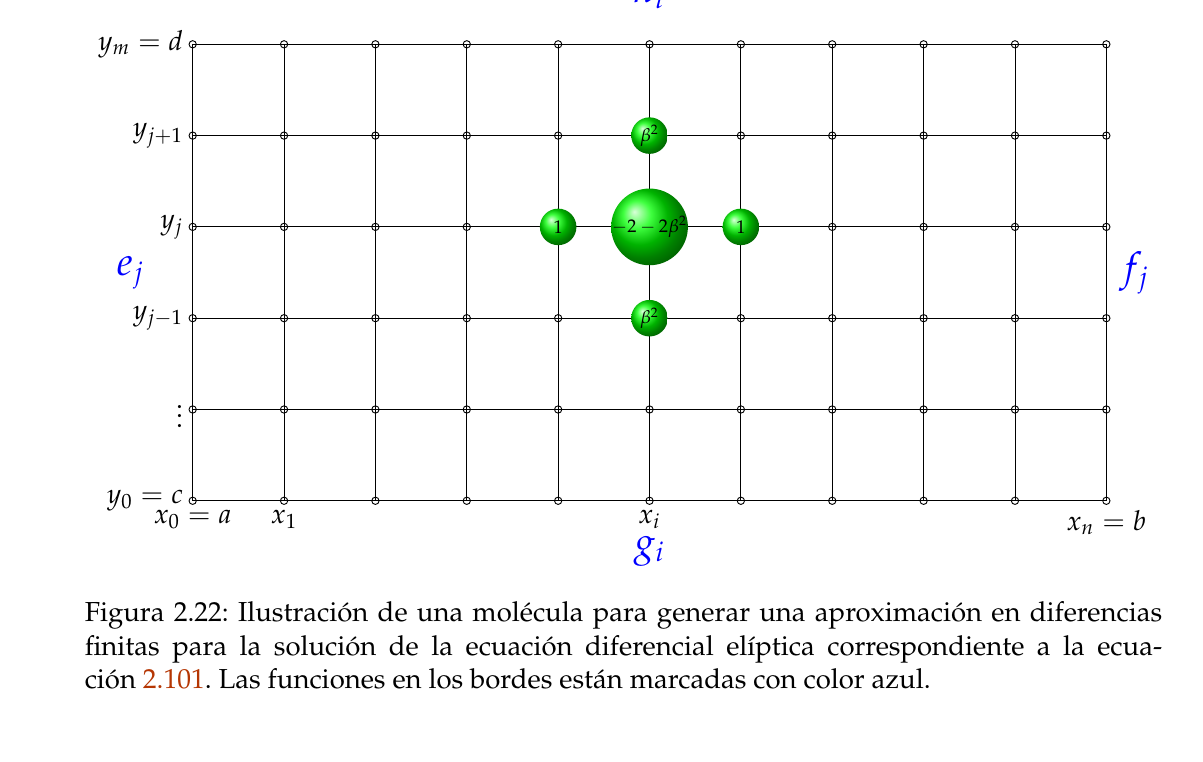

La Figura 2.22 muestra la molécula correspondiente al sistema (2).
Note que todos los nodos son verdes. No hay nodo de salida. A diferencia de los sistemas anteriors (parabólico , hiperbólico) no hay tiempo y todo es sumltáneo. Cualquier cambio en una celda produce cambio en todas las otras de forma simultánea.

En la proxima clase hacemos el empalme comenzando por "ecuacines elípticas¨.